In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preview'] = True
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
def rotate(X,Y,Z,G):
    """
    This function rotates all vectorial data such that vector G points towards the ground.
    It corrects for the tilted orientation of the smartphone in the bag during the flight.
    """
    R = [X,Y,Z]
    R = np.transpose(R)
    
    alpha = np.arctan(G[1]/G[2])
    Rx = np.array([ [1,             0,              0],
                    [0, np.cos(alpha), -np.sin(alpha)],
                    [0, np.sin(alpha), np.cos(alpha)]])
    G = np.dot(Rx,G)
    beta =  -np.arctan(G[0]/G[2])
    Ry = np.array([ [np.cos(beta),             0,   np.sin(beta)],
                    [0           ,             1,       0],
                    [-np.sin(beta),            0,   np.cos(beta)]])
    Rnew = []
    for r in R:
        rnew = np.dot(Rx,r)
        rnew = np.dot(Ry,rnew)
        Rnew.append(rnew)
    
    return np.transpose(Rnew)

In [3]:
Data = np.loadtxt('data.csv',delimiter=';', skiprows=2, usecols = range(23)+[24,25,26,29],
                  converters = {25: lambda s: float(s.strip() or np.nan)})
Data = Data[:][3000:11000]
[Ax,Ay,Az,Gx,Gy,Gz,lAx,lAy,lAz,Gyx,Gyy,Gyz,Mx,My,Mz,Oz,Ox,Oy,P,S,Ly,Lx,Lz,presAlt,V,dX,T] = np.transpose(Data)

In [4]:
T = T/1000. - 1670
Ox = -(Ox + 17.773)
Oy = Oy - 7.954

G = np.array([-1.292, 2.994, 9.249])
Ax,Ay,Az = rotate(Ax,Ay,Az,G)
lAx,lAy,lAz = rotate(lAx,lAy,lAz,G)

In [5]:
Heading = np.arctan2(-Mx,My)
Heading = np.rad2deg(Heading)
Heading = 0.5*(1-np.sign(Heading)) *(Heading + 360) + 0.5*(1+np.sign(Heading)) *Heading

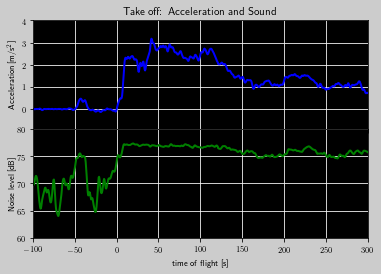

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,4))
ax1.set_title('Take off: Acceleration and Sound', fontsize=11)
ax1.plot(T,ndimage.filters.gaussian_filter(Ay,2), linewidth=2, color='blue')
ax1.set_xlim(-100,300)
ax1.set_ylim(-0.9,4)
ax1.set_ylabel('Acceleration [m/s$^2$]', fontsize=8)
ax1.set_facecolor('black')
ax1.grid(color='white')
ax1.yaxis.set_label_coords(-0.05, 0.5)

ax2.plot(T,ndimage.filters.gaussian_filter(S,2), linewidth=2, color='green')
ax2.set_ylim(60,80)
ax2.set_ylabel('Noise level [dB]', fontsize=8)
ax2.set_xlabel('time of flight [s]', fontsize=8)
ax2.set_facecolor('black')
ax2.grid(color='white')
ax2.yaxis.set_label_coords(-0.05, 0.5)

f.subplots_adjust(hspace=0)
f.patch.set_facecolor((0.8,0.8,0.8))
ax1.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', which='major', labelsize=8)

plt.savefig('Plots/TO.png',dpi=500, bbox_inches='tight')

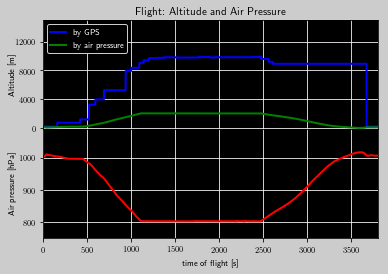

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,4))
ax1.set_title('Flight: Altitude and Air Pressure', fontsize=11)
ax1.plot(T,Lz, linewidth=2, color='blue', label='by GPS')
ax1.plot(T,presAlt, linewidth=2, color='green', label='by air pressure')
ax1.set_xlim(0,3800)
ax1.set_ylim(-200,15000)
ax1.set_ylabel('Altitude [m]', fontsize=8)
ax1.set_facecolor('black')
ax1.grid(color='white')
l = ax1.legend(loc='upper left', fontsize=8, framealpha=1)
l.get_frame().set_facecolor('black')
for text in l.get_texts():
    text.set_color('white')
ax1.set_yticks([0,4000,8000,12000])
ax1.yaxis.set_label_coords(-0.08, 0.5)

ax2.plot(T,P, linewidth=2, color='red')
ax2.set_ylim(750,1090)
ax2.set_ylabel('Air pressure [hPa]', fontsize=8)
ax2.set_xlabel('time of flight [s]', fontsize=8)
ax2.set_facecolor('black')
ax2.grid(color='white')
ax2.set_yticks([800,900,1000])
ax2.yaxis.set_label_coords(-0.08, 0.5)

f.subplots_adjust(hspace=0)
f.patch.set_facecolor((0.8,0.8,0.8))
ax1.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', which='major', labelsize=8)

plt.savefig('Plots/Altitude_Pressure.png',dpi=500, bbox_inches='tight')

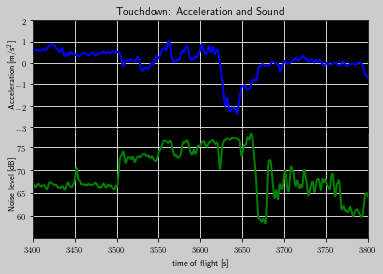

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,4))
ax1.set_title('Touchdown: Acceleration and Sound', fontsize=11)
ax1.plot(T,ndimage.filters.gaussian_filter(Ay,2), linewidth=2, color='blue')
ax1.set_xlim(3400,3800)
ax1.set_ylim(-3.1,2)
ax1.set_ylabel(r'Acceleration [m/s$^2$]', fontsize=8)
ax1.set_facecolor('black')
ax1.grid(color='white')
ax1.yaxis.set_label_coords(-0.05, 0.5)

ax2.plot(T,ndimage.filters.gaussian_filter(S,2), linewidth=2, color='green')
ax2.set_ylim(55.2,79)
ax2.set_ylabel(r'Noise level [dB]', fontsize=8)
ax2.set_xlabel(r'time of flight [s]', fontsize=8)
ax2.set_facecolor('black')
ax2.grid(color='white')
ax2.yaxis.set_label_coords(-0.05, 0.5)

f.subplots_adjust(hspace=0)
f.patch.set_facecolor((0.8,0.8,0.8))
ax1.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', which='major', labelsize=8)

plt.savefig('Plots/LND.png',dpi=500, bbox_inches='tight')

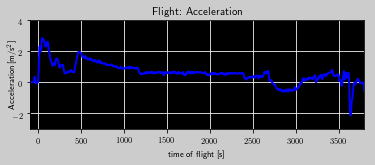

In [9]:
f, ax1 = plt.subplots(1, 1, figsize=(6,2))
ax1.set_title('Flight: Acceleration', fontsize=11)
ax1.plot(T,ndimage.filters.gaussian_filter(Ay,7), linewidth=2, color='blue')
ax1.set_xlim(-100,3800)
ax1.set_ylim(-3,4)
ax1.set_ylabel(r'Acceleration [m/s$^2$]', fontsize=8)
ax1.set_facecolor('black')
ax1.grid(color='white')
ax1.yaxis.set_label_coords(-0.04, 0.5)
ax1.set_xlabel(r'time of flight [s]', fontsize=8)

f.subplots_adjust(hspace=0)
f.patch.set_facecolor((0.8,0.8,0.8))
ax1.tick_params(axis='both', which='major', labelsize=8)

plt.savefig('Plots/Acceleration.png',dpi=500, bbox_inches='tight')

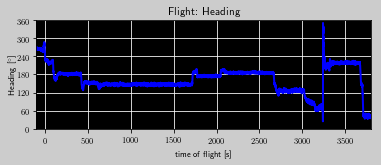

In [10]:
f, ax1 = plt.subplots(1, 1, figsize=(6,2))
ax1.set_title('Flight: Heading', fontsize=11)
ax1.plot(T,Heading, linewidth=2, color='blue')
ax1.set_xlim(-100,3800)
ax1.set_ylim(0,360)
ax1.set_ylabel(r'Heading [$^\circ$]', fontsize=8)
ax1.set_facecolor('black')
ax1.grid(color='white')
ax1.yaxis.set_label_coords(-0.06, 0.5)
ax1.set_xlabel(r'time of flight [s]', fontsize=8)
ax1.set_yticks([0,60,120,180,240,300,360])

f.subplots_adjust(hspace=0)
f.patch.set_facecolor((0.8,0.8,0.8))
ax1.tick_params(axis='both', which='major', labelsize=8)

plt.savefig('Plots/Heading.png',dpi=500, bbox_inches='tight')

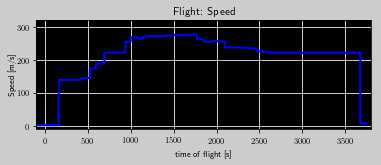

In [11]:
f, ax1 = plt.subplots(1, 1, figsize=(6,2))
ax1.set_title('Flight: Speed', fontsize=11)
ax1.plot(T,V, linewidth=2, color='blue')
ax1.set_xlim(-100,3800)
ax1.set_ylim(-10,320)
ax1.set_ylabel(r'Speed [m/s]', fontsize=8)
ax1.set_facecolor('black')
ax1.grid(color='white')
ax1.yaxis.set_label_coords(-0.06, 0.5)
ax1.set_xlabel(r'time of flight [s]', fontsize=8)
ax1.set_yticks([0,100,200,300])

f.subplots_adjust(hspace=0)
f.patch.set_facecolor((0.8,0.8,0.8))
ax1.tick_params(axis='both', which='major', labelsize=8)

plt.savefig('Plots/Speed.png',dpi=500, bbox_inches='tight')

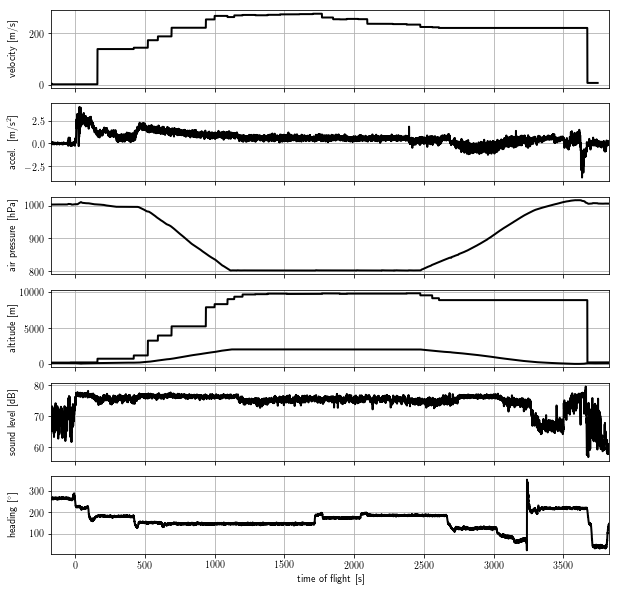

In [12]:
numplots = 6
f, axx = plt.subplots(numplots,1,figsize=(10,10),sharex=True)

axx[0].set_ylabel('velocity [m/s]')
axx[0].plot(T,V,label='speed', linewidth=2, color='black')
axx[0].grid()

axx[1].set_ylabel('accel. [m/s$^{2}$]')
axx[1].plot(T,Ay,label='Y', linewidth=2, color='black')
axx[1].grid()

axx[2].set_ylabel('air pressure [hPa]')
axx[2].plot(T,P,label='pressure', linewidth=2, color='black')
axx[2].grid()

axx[3].set_ylabel('altitude [m]')
axx[3].plot(T,Lz, linewidth=2, color='black')
axx[3].plot(T,presAlt, linewidth=2, color='black')
axx[3].grid()

axx[4].set_ylabel('sound level [dB]')
axx[4].plot(T,S,label='sound', linewidth=2, color='black')
axx[4].grid()

axx[5].set_ylabel('heading [$^\circ$]')
axx[5].plot(T,Heading,label='Heading', linewidth=2, color='black')
axx[5].grid()

axx[5].set_xlabel('time of flight [s]')
axx[0].set_xlim(-170,3830)

#align y axis labels
for ax in axx:
    ax.get_yaxis().set_label_coords(-0.06,0.5)

plt.savefig('fig.png',dpi=500, bbox_inches='tight')